3.Utilizando a base: https://www.kaggle.com/thesiff/premierleague1819. Execute os algoritmos
de clusterizacao citados a seguir e compare os resultados. 
○ Execute os algoritmos de agrupamento K-means e Hierarquico com os seguintes valores de K:2, 5, 10 e 100. Compare os agrupamento resultantes dos 2 algoritmos.
• Escolha um numero fixo de K e altere o parametro do K-Means referente ao numero
maximo de iteracoes: 1, 10 e 100 e o parametro de Linkage do Hierarquico, quais
diferencas puderam ser observadas?
• Faca uma comparacao entre os 2 algoritmos, qual voce acha que teve o melhor
desempenho e por que?
Bonus: normalizar os dados e executar novamente os algoritmos para analisar os novos
resultados gerados. Em seguida, fazer os graficos dos agrupamentos dos dados brutos vs
dados normalizados, e um boxplot para mostrar a dispersao destes dados. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('epl_1819.csv')

In [3]:
dataset.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


In [4]:
dataset.describe()

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,...,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,...,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,...,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,...,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,...,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,...,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,...,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,...,3.000000,148.000000,222.000000,548.000000,730.000000,8.000000,564.000000,10.000000,64.000000,89.000000


In [5]:
dataset = dataset.drop('Team', axis = 1)
dataset = dataset.drop('category', axis = 1)
dataset = dataset.drop('general_matches_played', axis = 1)
#retirando pontos e virgulas
dataset['attack_passes'] = dataset['attack_passes'].str.replace(',', '')
dataset['attack_passes_long'] = dataset['attack_passes_long'].str.replace(',', '')
dataset['attack_passes_back'] = dataset['attack_passes_back'].str.replace(',', '.')
dataset['defence_clearances'] = dataset['defence_clearances'].str.replace(',', '.')

In [6]:
dataset

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,1,26,150986355,32,2,4,95,23,72,98,...,58,63,362,518,0,543,295,4,64.0,89.0
1,2,29,152425146,30,7,1,89,22,67,97,...,76,78,314,610,2,639,317,1,58.8,84.4
2,3,25,146030216,21,9,8,63,39,24,72,...,85,73,351,618,2,593,330,2,59.9,87.6
3,4,26,145230801,23,2,13,67,39,28,71,...,121,112,326,626,3,770,411,5,56.7,83.2
4,5,25,142193180,21,7,10,73,51,22,70,...,133,118,412,609,2,762,404,7,56.1,83.3
5,6,27,142512868,19,9,10,65,54,11,66,...,122,128,355,581,2,785,370,6,53.3,82.3
6,7,15,127165114,16,9,13,47,46,1,57,...,100,148,501,720,2,824,464,4,47.4,78.2
7,8,18,128603905,15,9,14,54,46,8,54,...,94,85,456,700,4,825,430,5,51.0,77.3
8,9,15,123328078,15,7,16,51,48,3,52,...,90,96,436,676,4,945,500,5,50.8,79.2
9,10,16,122528663,15,7,16,52,55,-3,52,...,148,141,457,723,5,855,397,5,49.0,78.7


Segundo o Wikipedia "O método Elbow é um método heurístico de interpretação e validação de consistência na análise de cluster projetada para ajudar a encontrar o número apropriado de clusters em um conjunto de dados.O número de clusters é escolhido atraǘes do critério do cotovelo"


/home/jaqueline/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jaqueline/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


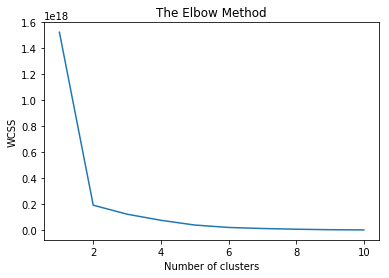

In [7]:
X = dataset.iloc[:, 1:].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
 

Neste caso nosso cotovelo está em 2, portanto este é o número ótimo de clusters

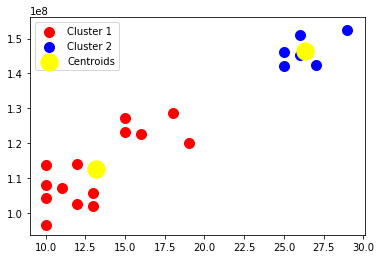

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, max_iter = 100)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

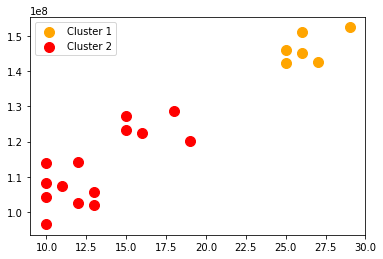

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)


plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.legend()
plt.show()